# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fc0240f79e8>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fc0240f7208>)


# 4.1

2 hidden layers

In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

Epoch 1: 2.6s to complete
    error(train)=9.40e-01, acc(train)=7.25e-01, error(valid)=9.52e-01, acc(valid)=7.17e-01


Epoch 2: 1.9s to complete
    error(train)=7.15e-01, acc(train)=7.82e-01, error(valid)=7.41e-01, acc(valid)=7.75e-01


Epoch 3: 2.1s to complete
    error(train)=6.39e-01, acc(train)=7.91e-01, error(valid)=6.77e-01, acc(valid)=7.82e-01


Epoch 4: 1.7s to complete
    error(train)=5.74e-01, acc(train)=8.15e-01, error(valid)=6.19e-01, acc(valid)=8.03e-01


Epoch 5: 1.6s to complete
    error(train)=5.26e-01, acc(train)=8.26e-01, error(valid)=5.77e-01, acc(valid)=8.14e-01


Epoch 6: 1.6s to complete
    error(train)=5.06e-01, acc(train)=8.32e-01, error(valid)=5.68e-01, acc(valid)=8.15e-01


Epoch 7: 1.6s to complete
    error(train)=4.74e-01, acc(train)=8.43e-01, error(valid)=5.45e-01, acc(valid)=8.21e-01


Epoch 8: 1.5s to complete
    error(train)=4.67e-01, acc(train)=8.42e-01, error(valid)=5.47e-01, acc(valid)=8.23e-01


Epoch 9: 1.5s to complete
    error(train)=4.34e-01, acc(train)=8.54e-01, error(valid)=5.18e-01, acc(valid)=8.29e-01


Epoch 10: 1.6s to complete
    error(train)=4.23e-01, acc(train)=8.55e-01, error(valid)=5.13e-01, acc(valid)=8.29e-01


Epoch 11: 1.6s to complete
    error(train)=4.06e-01, acc(train)=8.59e-01, error(valid)=5.09e-01, acc(valid)=8.31e-01


Epoch 12: 1.6s to complete
    error(train)=3.98e-01, acc(train)=8.62e-01, error(valid)=5.07e-01, acc(valid)=8.32e-01


Epoch 13: 1.6s to complete
    error(train)=3.81e-01, acc(train)=8.68e-01, error(valid)=4.92e-01, acc(valid)=8.38e-01


Epoch 14: 1.6s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


Epoch 15: 2.2s to complete
    error(train)=3.86e-01, acc(train)=8.65e-01, error(valid)=5.11e-01, acc(valid)=8.31e-01


Epoch 16: 2.5s to complete
    error(train)=3.59e-01, acc(train)=8.73e-01, error(valid)=4.91e-01, acc(valid)=8.37e-01


Epoch 17: 2.5s to complete
    error(train)=3.59e-01, acc(train)=8.71e-01, error(valid)=5.02e-01, acc(valid)=8.32e-01


Epoch 18: 1.8s to complete
    error(train)=3.52e-01, acc(train)=8.75e-01, error(valid)=4.96e-01, acc(valid)=8.36e-01


Epoch 19: 1.8s to complete
    error(train)=3.46e-01, acc(train)=8.76e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


Epoch 20: 1.9s to complete
    error(train)=3.31e-01, acc(train)=8.81e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


Epoch 21: 2.0s to complete
    error(train)=3.16e-01, acc(train)=8.88e-01, error(valid)=4.83e-01, acc(valid)=8.45e-01


Epoch 22: 2.2s to complete
    error(train)=3.20e-01, acc(train)=8.85e-01, error(valid)=4.92e-01, acc(valid)=8.38e-01


Epoch 23: 1.8s to complete
    error(train)=3.10e-01, acc(train)=8.88e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


Epoch 24: 1.8s to complete
    error(train)=3.13e-01, acc(train)=8.87e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


Epoch 25: 1.7s to complete
    error(train)=3.33e-01, acc(train)=8.77e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


Epoch 26: 1.8s to complete
    error(train)=2.94e-01, acc(train)=8.94e-01, error(valid)=4.95e-01, acc(valid)=8.43e-01


Epoch 27: 1.8s to complete
    error(train)=3.03e-01, acc(train)=8.89e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 28: 1.8s to complete
    error(train)=2.84e-01, acc(train)=8.97e-01, error(valid)=4.96e-01, acc(valid)=8.45e-01


Epoch 29: 1.7s to complete
    error(train)=2.92e-01, acc(train)=8.92e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


Epoch 30: 1.7s to complete
    error(train)=2.90e-01, acc(train)=8.94e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


Epoch 1: 1.7s to complete
    error(train)=9.75e-01, acc(train)=7.11e-01, error(valid)=9.84e-01, acc(valid)=7.05e-01


Epoch 2: 1.7s to complete
    error(train)=7.53e-01, acc(train)=7.70e-01, error(valid)=7.77e-01, acc(valid)=7.62e-01


Epoch 3: 1.7s to complete
    error(train)=6.27e-01, acc(train)=8.05e-01, error(valid)=6.56e-01, acc(valid)=7.98e-01


Epoch 4: 1.9s to complete
    error(train)=5.93e-01, acc(train)=8.02e-01, error(valid)=6.35e-01, acc(valid)=7.90e-01


Epoch 5: 1.7s to complete
    error(train)=5.32e-01, acc(train)=8.28e-01, error(valid)=5.82e-01, acc(valid)=8.12e-01


Epoch 6: 1.7s to complete
    error(train)=5.11e-01, acc(train)=8.32e-01, error(valid)=5.70e-01, acc(valid)=8.15e-01


Epoch 7: 1.7s to complete
    error(train)=4.80e-01, acc(train)=8.39e-01, error(valid)=5.46e-01, acc(valid)=8.23e-01


Epoch 8: 1.7s to complete
    error(train)=4.64e-01, acc(train)=8.45e-01, error(valid)=5.38e-01, acc(valid)=8.26e-01


Epoch 9: 1.7s to complete
    error(train)=4.46e-01, acc(train)=8.49e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


Epoch 10: 1.7s to complete
    error(train)=4.45e-01, acc(train)=8.46e-01, error(valid)=5.34e-01, acc(valid)=8.22e-01


Epoch 11: 1.7s to complete
    error(train)=4.05e-01, acc(train)=8.62e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


Epoch 12: 1.7s to complete
    error(train)=4.00e-01, acc(train)=8.62e-01, error(valid)=5.02e-01, acc(valid)=8.34e-01


Epoch 13: 1.7s to complete
    error(train)=4.04e-01, acc(train)=8.60e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


Epoch 14: 1.7s to complete
    error(train)=3.83e-01, acc(train)=8.62e-01, error(valid)=5.03e-01, acc(valid)=8.26e-01


Epoch 15: 1.7s to complete
    error(train)=3.66e-01, acc(train)=8.73e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


Epoch 16: 1.7s to complete
    error(train)=3.73e-01, acc(train)=8.70e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 17: 1.7s to complete
    error(train)=3.65e-01, acc(train)=8.72e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


Epoch 18: 1.7s to complete
    error(train)=3.61e-01, acc(train)=8.73e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


Epoch 19: 1.7s to complete
    error(train)=3.41e-01, acc(train)=8.77e-01, error(valid)=4.87e-01, acc(valid)=8.38e-01


Epoch 20: 1.7s to complete
    error(train)=3.42e-01, acc(train)=8.77e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 21: 1.7s to complete
    error(train)=3.34e-01, acc(train)=8.79e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


Epoch 22: 1.7s to complete
    error(train)=3.33e-01, acc(train)=8.82e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 23: 1.7s to complete
    error(train)=3.17e-01, acc(train)=8.87e-01, error(valid)=4.95e-01, acc(valid)=8.40e-01


Epoch 24: 1.7s to complete
    error(train)=3.13e-01, acc(train)=8.86e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01


Epoch 25: 1.8s to complete
    error(train)=3.04e-01, acc(train)=8.91e-01, error(valid)=4.98e-01, acc(valid)=8.41e-01


Epoch 26: 1.7s to complete
    error(train)=3.20e-01, acc(train)=8.83e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 27: 1.8s to complete
    error(train)=2.94e-01, acc(train)=8.94e-01, error(valid)=4.94e-01, acc(valid)=8.43e-01


Epoch 28: 1.7s to complete
    error(train)=3.07e-01, acc(train)=8.87e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 29: 1.7s to complete
    error(train)=2.93e-01, acc(train)=8.91e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 30: 1.7s to complete
    error(train)=3.01e-01, acc(train)=8.89e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 1: 1.7s to complete
    error(train)=9.61e-01, acc(train)=7.17e-01, error(valid)=9.74e-01, acc(valid)=7.12e-01


Epoch 2: 1.7s to complete
    error(train)=7.40e-01, acc(train)=7.71e-01, error(valid)=7.62e-01, acc(valid)=7.61e-01


Epoch 3: 1.7s to complete
    error(train)=6.34e-01, acc(train)=7.97e-01, error(valid)=6.66e-01, acc(valid)=7.88e-01


Epoch 4: 1.7s to complete
    error(train)=5.85e-01, acc(train)=8.12e-01, error(valid)=6.31e-01, acc(valid)=7.99e-01


Epoch 5: 1.7s to complete
    error(train)=5.37e-01, acc(train)=8.24e-01, error(valid)=5.89e-01, acc(valid)=8.08e-01


Epoch 6: 1.7s to complete
    error(train)=5.07e-01, acc(train)=8.27e-01, error(valid)=5.63e-01, acc(valid)=8.12e-01


Epoch 7: 1.7s to complete
    error(train)=4.78e-01, acc(train)=8.40e-01, error(valid)=5.42e-01, acc(valid)=8.22e-01


Epoch 8: 1.9s to complete
    error(train)=4.73e-01, acc(train)=8.40e-01, error(valid)=5.50e-01, acc(valid)=8.18e-01


Epoch 9: 1.8s to complete
    error(train)=4.41e-01, acc(train)=8.51e-01, error(valid)=5.26e-01, acc(valid)=8.26e-01


Epoch 10: 1.8s to complete
    error(train)=4.22e-01, acc(train)=8.56e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


Epoch 11: 1.8s to complete
    error(train)=4.15e-01, acc(train)=8.56e-01, error(valid)=5.14e-01, acc(valid)=8.28e-01


Epoch 12: 1.7s to complete
    error(train)=4.28e-01, acc(train)=8.50e-01, error(valid)=5.35e-01, acc(valid)=8.23e-01


Epoch 13: 1.7s to complete
    error(train)=4.02e-01, acc(train)=8.61e-01, error(valid)=5.17e-01, acc(valid)=8.30e-01


Epoch 14: 1.7s to complete
    error(train)=3.87e-01, acc(train)=8.66e-01, error(valid)=5.09e-01, acc(valid)=8.33e-01


Epoch 15: 1.7s to complete
    error(train)=3.71e-01, acc(train)=8.71e-01, error(valid)=4.98e-01, acc(valid)=8.35e-01


Epoch 16: 1.8s to complete
    error(train)=3.79e-01, acc(train)=8.67e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 17: 1.8s to complete
    error(train)=3.62e-01, acc(train)=8.71e-01, error(valid)=5.06e-01, acc(valid)=8.31e-01


Epoch 18: 1.8s to complete
    error(train)=3.57e-01, acc(train)=8.74e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


Epoch 19: 1.8s to complete
    error(train)=3.48e-01, acc(train)=8.78e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 20: 1.8s to complete
    error(train)=3.40e-01, acc(train)=8.79e-01, error(valid)=5.01e-01, acc(valid)=8.34e-01


Epoch 21: 1.7s to complete
    error(train)=3.47e-01, acc(train)=8.75e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


Epoch 22: 1.7s to complete
    error(train)=3.31e-01, acc(train)=8.82e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


Epoch 23: 1.7s to complete
    error(train)=3.36e-01, acc(train)=8.79e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 24: 1.7s to complete
    error(train)=3.18e-01, acc(train)=8.87e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


Epoch 25: 1.8s to complete
    error(train)=3.22e-01, acc(train)=8.83e-01, error(valid)=5.15e-01, acc(valid)=8.29e-01


Epoch 26: 1.7s to complete
    error(train)=3.11e-01, acc(train)=8.88e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


Epoch 27: 2.8s to complete
    error(train)=3.31e-01, acc(train)=8.76e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


Epoch 28: 2.0s to complete
    error(train)=3.08e-01, acc(train)=8.87e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


Epoch 29: 2.3s to complete
    error(train)=2.96e-01, acc(train)=8.92e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


Epoch 30: 2.3s to complete
    error(train)=2.91e-01, acc(train)=8.94e-01, error(valid)=5.16e-01, acc(valid)=8.38e-01


Epoch 1: 1.8s to complete
    error(train)=9.46e-01, acc(train)=7.25e-01, error(valid)=9.56e-01, acc(valid)=7.21e-01


Epoch 2: 1.8s to complete
    error(train)=7.39e-01, acc(train)=7.71e-01, error(valid)=7.66e-01, acc(valid)=7.67e-01


Epoch 3: 1.8s to complete
    error(train)=6.24e-01, acc(train)=8.03e-01, error(valid)=6.57e-01, acc(valid)=7.94e-01


Epoch 4: 1.8s to complete
    error(train)=5.74e-01, acc(train)=8.14e-01, error(valid)=6.15e-01, acc(valid)=8.05e-01


Epoch 5: 1.7s to complete
    error(train)=5.50e-01, acc(train)=8.17e-01, error(valid)=5.98e-01, acc(valid)=8.05e-01


Epoch 6: 1.7s to complete
    error(train)=4.97e-01, acc(train)=8.36e-01, error(valid)=5.57e-01, acc(valid)=8.17e-01


Epoch 7: 1.7s to complete
    error(train)=4.86e-01, acc(train)=8.39e-01, error(valid)=5.52e-01, acc(valid)=8.21e-01


Epoch 8: 1.7s to complete
    error(train)=4.71e-01, acc(train)=8.41e-01, error(valid)=5.46e-01, acc(valid)=8.18e-01


Epoch 9: 1.8s to complete
    error(train)=4.33e-01, acc(train)=8.52e-01, error(valid)=5.16e-01, acc(valid)=8.30e-01


Epoch 10: 1.7s to complete
    error(train)=4.20e-01, acc(train)=8.56e-01, error(valid)=5.12e-01, acc(valid)=8.28e-01


Epoch 11: 1.7s to complete
    error(train)=4.26e-01, acc(train)=8.53e-01, error(valid)=5.27e-01, acc(valid)=8.25e-01


Epoch 12: 1.7s to complete
    error(train)=3.83e-01, acc(train)=8.69e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


Epoch 13: 1.7s to complete
    error(train)=3.86e-01, acc(train)=8.66e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


Epoch 14: 1.7s to complete
    error(train)=3.86e-01, acc(train)=8.64e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


Epoch 15: 1.7s to complete
    error(train)=3.82e-01, acc(train)=8.63e-01, error(valid)=5.12e-01, acc(valid)=8.30e-01


Epoch 16: 1.7s to complete
    error(train)=3.65e-01, acc(train)=8.70e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


Epoch 17: 1.7s to complete
    error(train)=3.53e-01, acc(train)=8.76e-01, error(valid)=4.98e-01, acc(valid)=8.41e-01


Epoch 18: 1.7s to complete
    error(train)=3.50e-01, acc(train)=8.75e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


Epoch 19: 1.7s to complete
    error(train)=3.48e-01, acc(train)=8.74e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


Epoch 20: 1.7s to complete
    error(train)=3.40e-01, acc(train)=8.77e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


Epoch 21: 1.7s to complete
    error(train)=3.28e-01, acc(train)=8.83e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


Epoch 22: 1.7s to complete
    error(train)=3.11e-01, acc(train)=8.89e-01, error(valid)=4.92e-01, acc(valid)=8.43e-01


Epoch 23: 1.7s to complete
    error(train)=3.22e-01, acc(train)=8.82e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


Epoch 24: 1.7s to complete
    error(train)=3.07e-01, acc(train)=8.89e-01, error(valid)=5.01e-01, acc(valid)=8.41e-01


Epoch 25: 1.7s to complete
    error(train)=3.03e-01, acc(train)=8.89e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 26: 1.7s to complete
    error(train)=3.15e-01, acc(train)=8.86e-01, error(valid)=5.24e-01, acc(valid)=8.36e-01


Epoch 27: 1.7s to complete
    error(train)=3.00e-01, acc(train)=8.89e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


Epoch 28: 1.7s to complete
    error(train)=2.93e-01, acc(train)=8.95e-01, error(valid)=5.13e-01, acc(valid)=8.39e-01


Epoch 29: 1.7s to complete
    error(train)=2.91e-01, acc(train)=8.91e-01, error(valid)=5.13e-01, acc(valid)=8.38e-01


Epoch 30: 1.7s to complete
    error(train)=2.84e-01, acc(train)=8.95e-01, error(valid)=5.16e-01, acc(valid)=8.41e-01


Epoch 1: 1.7s to complete
    error(train)=9.66e-01, acc(train)=7.18e-01, error(valid)=9.79e-01, acc(valid)=7.12e-01


Epoch 2: 1.7s to complete
    error(train)=7.39e-01, acc(train)=7.69e-01, error(valid)=7.59e-01, acc(valid)=7.67e-01


Epoch 3: 1.6s to complete
    error(train)=6.32e-01, acc(train)=8.01e-01, error(valid)=6.67e-01, acc(valid)=7.90e-01


Epoch 4: 1.7s to complete
    error(train)=5.77e-01, acc(train)=8.13e-01, error(valid)=6.22e-01, acc(valid)=7.99e-01


Epoch 5: 1.7s to complete
    error(train)=5.27e-01, acc(train)=8.28e-01, error(valid)=5.80e-01, acc(valid)=8.10e-01


Epoch 6: 1.7s to complete
    error(train)=5.22e-01, acc(train)=8.28e-01, error(valid)=5.83e-01, acc(valid)=8.12e-01


Epoch 7: 1.7s to complete
    error(train)=4.70e-01, acc(train)=8.42e-01, error(valid)=5.46e-01, acc(valid)=8.20e-01


Epoch 8: 1.7s to complete
    error(train)=4.48e-01, acc(train)=8.48e-01, error(valid)=5.30e-01, acc(valid)=8.24e-01


Epoch 9: 1.7s to complete
    error(train)=4.28e-01, acc(train)=8.56e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 10: 1.7s to complete
    error(train)=4.21e-01, acc(train)=8.56e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01


Epoch 11: 1.7s to complete
    error(train)=4.07e-01, acc(train)=8.59e-01, error(valid)=5.15e-01, acc(valid)=8.28e-01


Epoch 12: 1.7s to complete
    error(train)=3.99e-01, acc(train)=8.64e-01, error(valid)=5.10e-01, acc(valid)=8.31e-01


Epoch 13: 1.7s to complete
    error(train)=3.75e-01, acc(train)=8.70e-01, error(valid)=4.98e-01, acc(valid)=8.34e-01


Epoch 14: 1.7s to complete
    error(train)=3.77e-01, acc(train)=8.65e-01, error(valid)=5.00e-01, acc(valid)=8.28e-01


Epoch 15: 1.9s to complete
    error(train)=3.73e-01, acc(train)=8.68e-01, error(valid)=5.09e-01, acc(valid)=8.31e-01


Epoch 16: 1.7s to complete
    error(train)=3.70e-01, acc(train)=8.66e-01, error(valid)=5.14e-01, acc(valid)=8.28e-01


Epoch 17: 1.6s to complete
    error(train)=3.52e-01, acc(train)=8.76e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


Epoch 18: 1.7s to complete
    error(train)=3.47e-01, acc(train)=8.77e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


Epoch 19: 1.7s to complete
    error(train)=3.34e-01, acc(train)=8.82e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


Epoch 20: 1.7s to complete
    error(train)=3.29e-01, acc(train)=8.81e-01, error(valid)=4.91e-01, acc(valid)=8.37e-01


Epoch 21: 1.7s to complete
    error(train)=3.39e-01, acc(train)=8.78e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


Epoch 22: 1.6s to complete
    error(train)=3.28e-01, acc(train)=8.81e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 23: 1.7s to complete
    error(train)=3.11e-01, acc(train)=8.88e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


Epoch 24: 1.7s to complete
    error(train)=3.17e-01, acc(train)=8.86e-01, error(valid)=5.19e-01, acc(valid)=8.37e-01


Epoch 25: 1.9s to complete
    error(train)=3.08e-01, acc(train)=8.87e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 26: 1.7s to complete
    error(train)=3.26e-01, acc(train)=8.78e-01, error(valid)=5.41e-01, acc(valid)=8.26e-01


Epoch 27: 1.7s to complete
    error(train)=2.85e-01, acc(train)=8.96e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 28: 1.6s to complete
    error(train)=2.93e-01, acc(train)=8.91e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


Epoch 29: 1.6s to complete
    error(train)=2.86e-01, acc(train)=8.94e-01, error(valid)=5.20e-01, acc(valid)=8.37e-01


Epoch 30: 1.7s to complete
    error(train)=2.87e-01, acc(train)=8.91e-01, error(valid)=5.28e-01, acc(valid)=8.34e-01


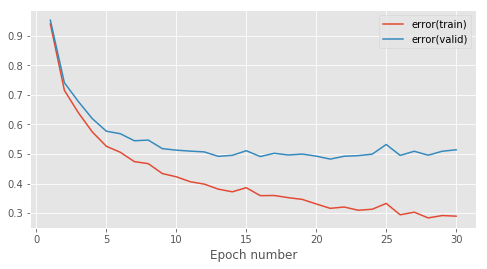

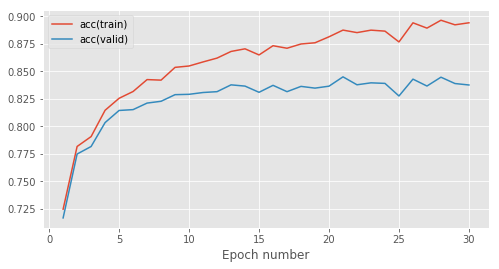

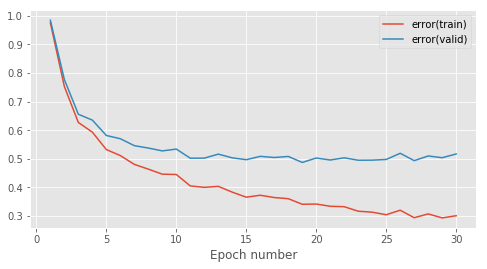

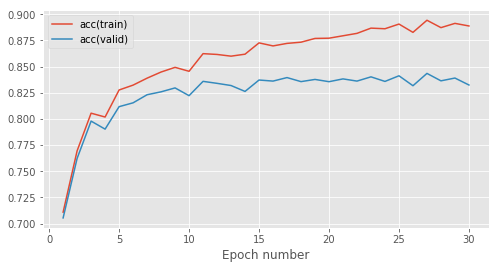

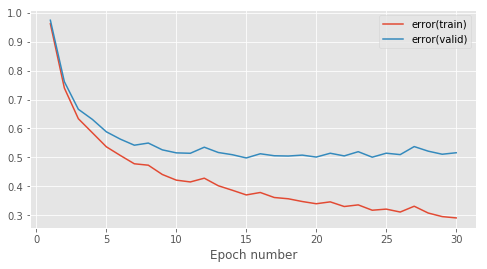

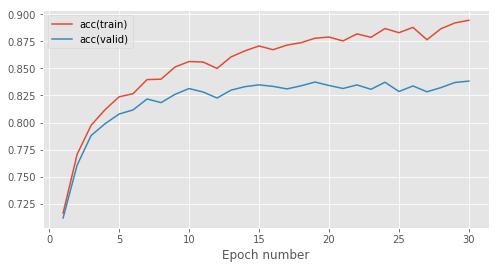

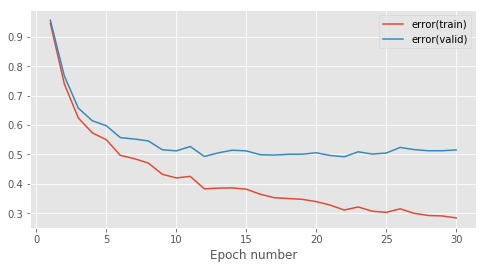

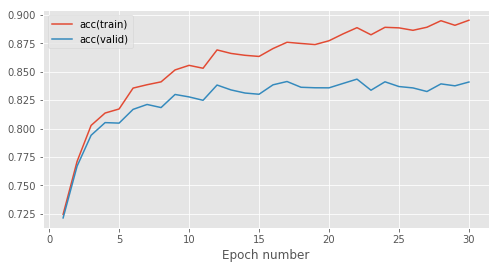

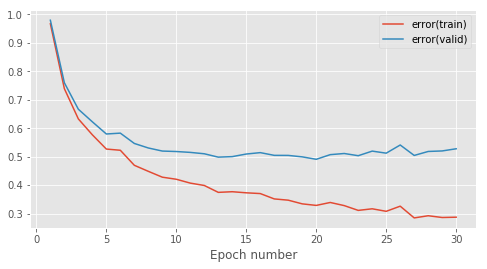

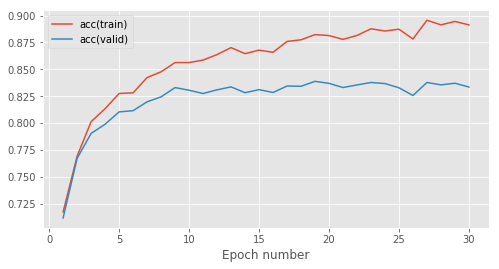

In [4]:
#setup hyperparameters
learning_rate = 0.1
num_epochs = 20
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
error = CrossEntropySoftmaxError()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

five_stats = np.empty((5,num_epochs+1,4))
for count in range(0,5):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats

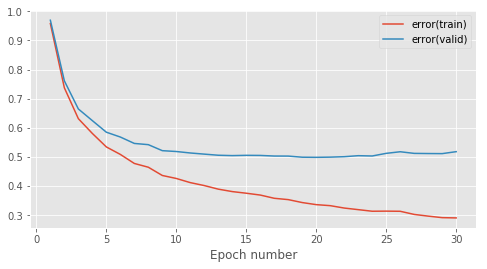

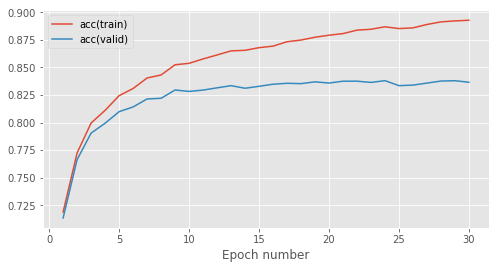

In [5]:
sum_stats = np.sum(five_stats,axis=0)
stats = sum_stats/5

fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for k in ['error(train)', 'error(valid)']:
    ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:, keys[k]], label=k)
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number')


fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)
for k in ['acc(train)', 'acc(valid)']:
    ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:, keys[k]], label=k)
ax_2.legend(loc=0)
ax_2.set_xlabel('Epoch number')
plt.show()

In [8]:
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

data_mon_vals = 0.
data_monitor = lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()
for inputs_batch, targets_batch in test_data:
    outputs_batch = model.fprop(inputs_batch)[-1]
    data_mon_vals += data_monitor(outputs_batch, targets_batch)
data_mon_vals /= test_data.num_batches
print(data_mon_vals)

    
    
# #test accuracy
# from collections import OrderedDict

# label='(test)'
# dataset=test_data
# data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
# data_mon_vals = OrderedDict([(key + label, 0.) for key in data_monitors.keys()])
# for inputs_batch, targets_batch in dataset:
#     activations = model.fprop(inputs_batch, evaluation=True)
#     for key, data_monitor in data_monitors.items():
#         data_mon_vals[key + label] += data_monitor(activations[-1], targets_batch)

# for key, data_monitor in data_monitors.items():
#     data_mon_vals[key + label] /= dataset.num_batches
    
# print(data_mon_vals)


KeysView(<numpy.lib.npyio.NpzFile object at 0x7fbffa3331d0>)
0.8229113924050632


3 hidden layers

In [ ]:
#setup hyperparameters
learning_rate = 0.1
num_epochs = 20
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
error = CrossEntropySoftmaxError()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

five_stats = np.empty((5,num_epochs+1,4))
for count in range(0,5):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats

Epoch 1: 2.4s to complete
    error(train)=9.16e-01, acc(train)=7.21e-01, error(valid)=9.34e-01, acc(valid)=7.19e-01


Epoch 2: 2.5s to complete
    error(train)=6.81e-01, acc(train)=7.82e-01, error(valid)=7.07e-01, acc(valid)=7.80e-01


Epoch 3: 2.3s to complete
    error(train)=5.78e-01, acc(train)=8.11e-01, error(valid)=6.17e-01, acc(valid)=8.01e-01


Epoch 4: 2.3s to complete
    error(train)=5.34e-01, acc(train)=8.24e-01, error(valid)=5.86e-01, acc(valid)=8.10e-01


Epoch 5: 2.6s to complete
    error(train)=4.99e-01, acc(train)=8.34e-01, error(valid)=5.58e-01, acc(valid)=8.20e-01


Epoch 6: 2.3s to complete
    error(train)=4.77e-01, acc(train)=8.38e-01, error(valid)=5.46e-01, acc(valid)=8.20e-01


Epoch 7: 2.3s to complete
    error(train)=4.44e-01, acc(train)=8.48e-01, error(valid)=5.20e-01, acc(valid)=8.28e-01


Epoch 8: 2.2s to complete
    error(train)=4.31e-01, acc(train)=8.52e-01, error(valid)=5.21e-01, acc(valid)=8.27e-01


Epoch 9: 2.6s to complete
    error(train)=4.45e-01, acc(train)=8.45e-01, error(valid)=5.51e-01, acc(valid)=8.20e-01


Epoch 10: 2.3s to complete
    error(train)=3.92e-01, acc(train)=8.62e-01, error(valid)=4.98e-01, acc(valid)=8.33e-01


Epoch 11: 2.4s to complete
    error(train)=4.03e-01, acc(train)=8.56e-01, error(valid)=5.22e-01, acc(valid)=8.25e-01


Epoch 12: 2.1s to complete
    error(train)=3.66e-01, acc(train)=8.70e-01, error(valid)=4.94e-01, acc(valid)=8.36e-01


Epoch 13: 2.2s to complete
    error(train)=3.80e-01, acc(train)=8.62e-01, error(valid)=5.15e-01, acc(valid)=8.27e-01


Epoch 14: 2.4s to complete
    error(train)=3.55e-01, acc(train)=8.73e-01, error(valid)=5.05e-01, acc(valid)=8.33e-01


Epoch 15: 2.1s to complete
    error(train)=3.43e-01, acc(train)=8.74e-01, error(valid)=4.98e-01, acc(valid)=8.30e-01


Epoch 16: 2.4s to complete
    error(train)=3.49e-01, acc(train)=8.74e-01, error(valid)=5.08e-01, acc(valid)=8.33e-01


Epoch 17: 2.3s to complete
    error(train)=3.48e-01, acc(train)=8.73e-01, error(valid)=5.20e-01, acc(valid)=8.29e-01


Epoch 18: 2.8s to complete
    error(train)=3.40e-01, acc(train)=8.76e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


Epoch 19: 2.4s to complete
    error(train)=3.13e-01, acc(train)=8.84e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


Epoch 20: 2.5s to complete
    error(train)=3.08e-01, acc(train)=8.85e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 21: 2.0s to complete
    error(train)=3.07e-01, acc(train)=8.85e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 22: 2.0s to complete
    error(train)=3.09e-01, acc(train)=8.84e-01, error(valid)=5.33e-01, acc(valid)=8.32e-01


Epoch 23: 2.0s to complete
    error(train)=2.92e-01, acc(train)=8.90e-01, error(valid)=5.20e-01, acc(valid)=8.39e-01


Epoch 24: 2.0s to complete
    error(train)=2.91e-01, acc(train)=8.91e-01, error(valid)=5.26e-01, acc(valid)=8.35e-01


Epoch 25: 2.0s to complete
    error(train)=2.90e-01, acc(train)=8.91e-01, error(valid)=5.34e-01, acc(valid)=8.33e-01


Epoch 26: 2.0s to complete
    error(train)=2.83e-01, acc(train)=8.91e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


Epoch 27: 2.0s to complete
    error(train)=2.79e-01, acc(train)=8.92e-01, error(valid)=5.50e-01, acc(valid)=8.30e-01


Epoch 28: 2.3s to complete
    error(train)=2.99e-01, acc(train)=8.87e-01, error(valid)=5.64e-01, acc(valid)=8.32e-01


Epoch 29: 2.0s to complete
    error(train)=2.72e-01, acc(train)=8.96e-01, error(valid)=5.49e-01, acc(valid)=8.33e-01


Epoch 30: 1.9s to complete
    error(train)=2.60e-01, acc(train)=9.01e-01, error(valid)=5.42e-01, acc(valid)=8.37e-01


Epoch 1: 2.0s to complete
    error(train)=8.85e-01, acc(train)=7.30e-01, error(valid)=9.01e-01, acc(valid)=7.25e-01


Epoch 2: 2.0s to complete
    error(train)=7.02e-01, acc(train)=7.74e-01, error(valid)=7.27e-01, acc(valid)=7.69e-01


Epoch 3: 2.3s to complete
    error(train)=5.94e-01, acc(train)=8.06e-01, error(valid)=6.33e-01, acc(valid)=7.96e-01


Epoch 4: 2.5s to complete
    error(train)=5.29e-01, acc(train)=8.23e-01, error(valid)=5.82e-01, acc(valid)=8.07e-01


Epoch 5: 2.6s to complete
    error(train)=5.17e-01, acc(train)=8.26e-01, error(valid)=5.79e-01, acc(valid)=8.12e-01


Epoch 6: 2.5s to complete
    error(train)=4.87e-01, acc(train)=8.30e-01, error(valid)=5.65e-01, acc(valid)=8.11e-01


Epoch 7: 2.3s to complete
    error(train)=4.28e-01, acc(train)=8.55e-01, error(valid)=5.18e-01, acc(valid)=8.30e-01


Epoch 8: 2.3s to complete
    error(train)=4.19e-01, acc(train)=8.55e-01, error(valid)=5.21e-01, acc(valid)=8.28e-01


Epoch 9: 2.1s to complete
    error(train)=4.12e-01, acc(train)=8.55e-01, error(valid)=5.16e-01, acc(valid)=8.29e-01


Epoch 10: 2.4s to complete
    error(train)=3.84e-01, acc(train)=8.66e-01, error(valid)=4.99e-01, acc(valid)=8.35e-01


Epoch 11: 2.1s to complete
    error(train)=3.71e-01, acc(train)=8.68e-01, error(valid)=4.97e-01, acc(valid)=8.35e-01


Epoch 12: 2.0s to complete
    error(train)=3.73e-01, acc(train)=8.66e-01, error(valid)=5.04e-01, acc(valid)=8.33e-01


Epoch 13: 2.2s to complete
    error(train)=3.56e-01, acc(train)=8.73e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01


Epoch 14: 2.0s to complete
    error(train)=3.53e-01, acc(train)=8.72e-01, error(valid)=4.96e-01, acc(valid)=8.36e-01


Epoch 15: 2.0s to complete
    error(train)=3.44e-01, acc(train)=8.73e-01, error(valid)=5.04e-01, acc(valid)=8.32e-01


Epoch 16: 1.9s to complete
    error(train)=3.36e-01, acc(train)=8.78e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


Epoch 17: 1.9s to complete
    error(train)=3.22e-01, acc(train)=8.82e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


Epoch 18: 2.2s to complete
    error(train)=3.32e-01, acc(train)=8.76e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


Epoch 19: 2.6s to complete
    error(train)=3.11e-01, acc(train)=8.85e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


Epoch 20: 2.5s to complete
    error(train)=3.07e-01, acc(train)=8.86e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


Epoch 21: 2.1s to complete
    error(train)=2.98e-01, acc(train)=8.90e-01, error(valid)=5.11e-01, acc(valid)=8.38e-01


Epoch 22: 2.2s to complete
    error(train)=2.97e-01, acc(train)=8.90e-01, error(valid)=5.16e-01, acc(valid)=8.37e-01


Epoch 23: 2.5s to complete
    error(train)=2.94e-01, acc(train)=8.89e-01, error(valid)=5.30e-01, acc(valid)=8.35e-01


Epoch 24: 2.5s to complete
    error(train)=2.89e-01, acc(train)=8.89e-01, error(valid)=5.15e-01, acc(valid)=8.38e-01


Epoch 25: 2.4s to complete
    error(train)=2.82e-01, acc(train)=8.93e-01, error(valid)=5.17e-01, acc(valid)=8.40e-01


Epoch 26: 2.6s to complete
    error(train)=2.89e-01, acc(train)=8.89e-01, error(valid)=5.36e-01, acc(valid)=8.35e-01


Epoch 27: 2.2s to complete
    error(train)=2.73e-01, acc(train)=8.96e-01, error(valid)=5.37e-01, acc(valid)=8.38e-01


Epoch 28: 2.1s to complete
    error(train)=2.86e-01, acc(train)=8.89e-01, error(valid)=5.65e-01, acc(valid)=8.24e-01


Epoch 29: 2.0s to complete
    error(train)=2.67e-01, acc(train)=8.98e-01, error(valid)=5.50e-01, acc(valid)=8.34e-01


Epoch 30: 1.9s to complete
    error(train)=2.62e-01, acc(train)=8.98e-01, error(valid)=5.40e-01, acc(valid)=8.35e-01


4 hidden layers

In [ ]:
#setup hyperparameters
learning_rate = 0.1
num_epochs = 20
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
error = CrossEntropySoftmaxError()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

five_stats = np.empty((5,num_epochs+1,4))
for count in range(0,5):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats

5 hidden layers

In [ ]:
#setup hyperparameters
learning_rate = 0.1
num_epochs = 30
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
error = CrossEntropySoftmaxError()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

five_stats = np.empty((5,num_epochs+1,4))
for count in range(0,5):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats

# 4.2

In [ ]:
from mlp.learning_rules import RMSPropLearningRule

learning_rate = 0.1
num_epochs = 30
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
error = CrossEntropySoftmaxError()
learning_rule = RMSPropLearningRule()

five_stats = np.empty((5,num_epochs+1,4))
for count in range(0,5):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats

In [ ]:
from mlp.learning_rules import AdamLearningRule

learning_rate = 0.1
num_epochs = 20
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule()
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

cosine annealing

In [ ]:
def train_model_and_plot_stats_cosine(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,
        scheduler=None):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook, 
        scheduler=scheduler)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [ ]:
from mlp.learning_rules import AdamLearningRule
from mlp.schedulers import CosineAnnealingWithWarmRestarts

learning_rate = 0.1
num_epochs = 20
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule()
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

min_learning_rate = 0.001
max_learning_rate = 0.1
total_iters_per_period = 5
max_learning_rate_discount_factor = 0.9
period_iteration_expansion_factor = 3
scheduler = CosineAnnealingWithWarmRestarts(
    min_learning_rate, max_learning_rate, total_iters_per_period, 
    max_learning_rate_discount_factor, period_iteration_expansion_factor)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats_cosine(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, 
    scheduler=scheduler)